## GPS Data Plotting and Measurements

In [1]:
# user defined functions
import odor_statistics_lib as osm

# dataframes
import pandas as pd
import h5py

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import signal
from scipy import stats

#plots
import figurefirst
from figurefirst import FigureLayout,mpl_functions
import matplotlib.ticker as mtick
import pylab as plt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib.image as mpimg
# sns.set()
sns.set_style("whitegrid")

In [2]:
#df = pd.read_hdf("~/data/DesertDataOct/Run02/Interpolated_0.h5") #load_GPS_directory_to_pandas('.')
df = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/WindData/Forest/windgpsdata.hdf")
# df = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/WindData/Desert/windgpsdata.hdf")

In [3]:
time =df.time-df.time[0]
df['time']=time

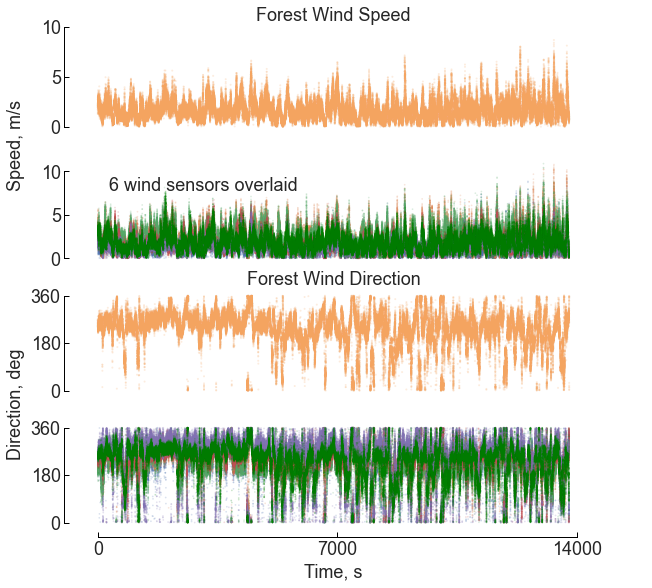

In [4]:
f, (ax1,ax2,ax3,ax4)=plt.subplots(4,1, figsize=(8,8))

ax1.scatter(df.time,df.S2_1, label='Station01', c='sandybrown', edgecolors='none', alpha=0.2,s=4)
ax2.scatter(df.time,df.S2_2, label='Station05', edgecolors='none', alpha=0.2, s=3)
ax2.scatter(df.time,df.S2_3, label='Station06', edgecolors='none', alpha=0.2, s=3)
ax2.scatter(df.time,df.S2_5, label='Station07', edgecolors='none', alpha=0.2, s=3)
ax2.scatter(df.time,df.S2_6, label='Station08', edgecolors='none', alpha=0.2, s=3)
ax2.scatter(df.time,df.S2_8, label='Station09', edgecolors='none', alpha=0.2, s=3)
ax2.scatter(df.time,df.S2_9, c='green', label='Station09', edgecolors='none', alpha=0.2, s=3)

ax3.scatter(df.time ,df.D_1, label='Station01',  c='sandybrown', edgecolors='none', alpha=0.2,s=4)
ax4.scatter(df.time ,df.D_2, label='Station05', edgecolors='none', alpha=0.2,s=3)
ax4.scatter(df.time ,df.D_3, label='Station06', edgecolors='none', alpha=0.2, s=3)
ax4.scatter(df.time ,df.D_5, label='Station07', edgecolors='none', alpha=0.2, s=3)
ax4.scatter(df.time ,df.D_6, label='Station08', edgecolors='none', alpha=0.2,s=3)
ax4.scatter(df.time ,df.D_8, label='Station09', edgecolors='none', alpha=0.2,s=3)
ax4.scatter(df.time ,df.D_9, c='green', label='Station09', edgecolors='none', alpha=0.2, s=3)


# ax1.set_xlim(0,80000)
# ax2.set_xlim(0,80000)
# ax3.set_xlim(0,80000)
# ax4.set_xlim(0,80000)
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)


mpl_functions.adjust_spines(ax1,['left'],
                            spine_locations={}, 
                            smart_bounds=True,
#                             xticks=[0,2000,4000,6000,8000,10000,12000],
                            yticks=[0,5,10],
                            linewidth=1)
                                 
mpl_functions.adjust_spines(ax2,['left'],
                            spine_locations={}, 
                            smart_bounds=True,
#                             xticks=[0,40000,80000],
                            yticks=[0,5,10],
                            linewidth=1)


mpl_functions.adjust_spines(ax3,['left'],
                            spine_locations={}, 
                            smart_bounds=True,
#                             xticks=[0,2000,4000,6000,8000,10000,12000],
#                             xticks=[0,95000],
                            yticks=[0,180,360],
                            linewidth=1)
                                 
mpl_functions.adjust_spines(ax4,['left','bottom'],
                            spine_locations={}, 
                            smart_bounds=True,
                            xticks=[0,7000,14000],
                            yticks=[0,180,360],
                            linewidth=1)
ax1.set_title('Forest Wind Speed')
ax3.set_title('Forest Wind Direction')
# ax1.set_ylabel('Direction, Deg')
# ax2.set_ylabel('Direction, Deg')
ax4.set_xlabel('Time, s')
f.text(-0.04, 0.75, 'Speed, m/s', va='center', rotation='vertical')
f.text(-0.04, 0.3, 'Direction, deg', va='center', rotation='vertical')

f.text(0.3,0.67, '6 wind sensors overlaid', ha='center', rotation='horizontal')

f.tight_layout(pad=1)
figurefirst.mpl_functions.set_fontsize(f, 18)
# ax1.legend()
# ax2.legend(loc='upper right',fancybox=True, shadow=False, framealpha=0.6)
# f.savefig('../../Figure/Paper/ForestWind.jpeg', dpi=300, bbox_inches = "tight")

In [3]:
df1 = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/DesertWind/20201020_172919_windy_b_data.hdf")
df2 = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/DesertWind/20201020_19591_windy_a_data.hdf")
df3 = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/DesertWind/20201020_172458_windy_d_data.hdf")
df4 = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/DesertWind/20201020_17112_windy_e_data.hdf")
df5 = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/DesertWind/20201020_17327_windy_f_data.hdf")
df6 = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/DesertWind/20201020_171735_windy_g_data.hdf")
df7 = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/DesertWind/20201020_171353_windy_h_data.hdf")
df8 = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/DesertWind/20201020_172648_windy_i_data.hdf")

In [4]:
# dt=df1.time_epoch.iloc[1]-df1.time_epoch.iloc[0]

# arr_dat = [df1,df3,df4,df5,df6,df7,df8]
# for i in range(len(arr_dat)):
#     dataframe = arr_dat[i]
#     time = []
#     time.append(0)
#     for j in range(1,len(arr_dat[i])):
#         time.append(time[j-1]+dt)

#     arr_dat[i]['time'] = time                                

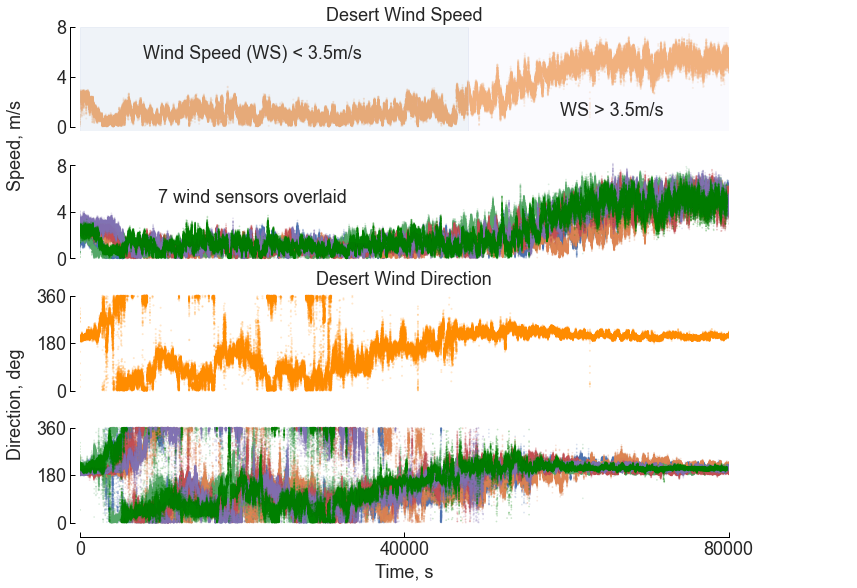

In [6]:
f, (ax1,ax2,ax3,ax4)=plt.subplots(4,1, figsize=(10,8))
ax1.axvspan(0, 47839,  alpha=0.2, color='lightsteelblue')
ax1.axvspan(47839,80201,  alpha=0.2, color='lavender')
ax1.scatter(df1.time,df1.S2, label='Station01', c='sandybrown',edgecolors='none', alpha=0.2,s=4)
# ax2.scatter(df2.time_epoch,df2.S2, label='Station02', edgecolors='none', alpha=0.2)
ax2.scatter(df3.time,df3.S2, label='Station05', edgecolors='none', alpha=0.2, s=3)
ax2.scatter(df4.time,df4.S2, label='Station06', edgecolors='none', alpha=0.2, s=3)
ax2.scatter(df5.time,df5.S2, label='Station07', edgecolors='none', alpha=0.2, s=3)
ax2.scatter(df6.time,df6.S2, label='Station08', edgecolors='none', alpha=0.2, s=3)
ax2.scatter(df7.time,df7.S2, label='Station09', edgecolors='none', alpha=0.2, s=3)
ax2.scatter(df8.time,df8.S2, c='green', label='Station09', edgecolors='none', alpha=0.2, s=3)

ax3.scatter(df1.time ,df1.D, label='Station01', c='darkorange', edgecolors='none', alpha=0.2,s=4)
# ax2.scatter(df2.time ,df2.D, label='Station02', edgecolors='none', alpha=0.2)
ax4.scatter(df3.time ,df3.D, label='Station05', edgecolors='none', alpha=0.2,s=3)
ax4.scatter(df4.time ,df4.D, label='Station06', edgecolors='none', alpha=0.2, s=3)
ax4.scatter(df5.time ,df5.D, label='Station07', edgecolors='none', alpha=0.2, s=3)
ax4.scatter(df6.time ,df6.D, label='Station08', edgecolors='none', alpha=0.2,s=3)
ax4.scatter(df7.time ,df7.D, label='Station09', edgecolors='none', alpha=0.2,s=3)
ax4.scatter(df8.time ,df8.D, c='green', label='Station09', edgecolors='none', alpha=0.2, s=3)


ax1.set_xlim(0,80000)
ax2.set_xlim(0,80000)
ax3.set_xlim(0,80000)
ax4.set_xlim(0,80000)
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)

mpl_functions.adjust_spines(ax1,['left'],
                            spine_locations={}, 
                            smart_bounds=True,
#                             xticks=[0,2000,4000,6000,8000,10000,12000],
                            yticks=[0,4,8],
                            linewidth=1)
                                 
mpl_functions.adjust_spines(ax2,['left'],
                            spine_locations={}, 
                            smart_bounds=True,
                            xticks=[0,40000,80000],
                            yticks=[0,4,8],
                            linewidth=1)


mpl_functions.adjust_spines(ax3,['left'],
                            spine_locations={}, 
                            smart_bounds=True,
#                             xticks=[0,2000,4000,6000,8000,10000,12000],
                            xticks=[0,95000],
                            yticks=[0,180,360],
                            linewidth=1)
                                 
mpl_functions.adjust_spines(ax4,['left','bottom'],
                            spine_locations={}, 
                            smart_bounds=True,
                            xticks=[0,40000,80000],
                            yticks=[0,180,360],
                            linewidth=1)
ax1.set_title('Desert Wind Speed')
ax3.set_title('Desert Wind Direction')
# ax1.set_ylabel('Direction, Deg')
# ax2.set_ylabel('Direction, Deg')
ax4.set_xlabel('Time, s')
f.text(-0.04, 0.75, 'Speed, m/s', va='center', rotation='vertical')
f.text(-0.04, 0.3, 'Direction, deg', va='center', rotation='vertical')
f.text(0.3, .9, 'Wind Speed (WS) < 3.5m/s', ha='center', rotation='horizontal')
f.text(0.8, .8, 'WS > 3.5m/s', ha='center', rotation='horizontal')

f.text(0.3,0.65, '7 wind sensors overlaid', ha='center', rotation='horizontal')

# f.suptitle("Desert Wind Direction")
f.tight_layout(pad=1)
figurefirst.mpl_functions.set_fontsize(f, 18)
# ax1.legend()
# ax2.legend(loc='upper right',fancybox=True, shadow=False, framealpha=0.6)
f.savefig('../../Figure/Paper/DesertWind.jpeg', dpi=300, bbox_inches = "tight")

In [35]:
df['master_time']=df.time

In [36]:
time = []
dt=df.master_time.iloc[1]-df.master_time.iloc[0]
time.append(0)
for i in range(1,len(df)):
    time.append(time[i-1]+dt)
    
df['time'] = time                                

In [39]:
plt.rcParams['font.family']

['sans-serif']

In [ ]:
### mean_latitude = df.lat.mean()
# mean_longitude= df.lon.mean()
# minValueLong = df.lon.min()
# maxValueLong = df.lon.max()
# minValueLat = df.lat.min()
# maxValueLat = df.lat.max()
# print("meanLatitude:%.6f" %mean_latitude)
# print("meanLongitude:%.6f" %mean_longitude)
# print("minvaluelong:%.6f" %minValueLong)
# print("maxvaluelong:%.6f" %maxValueLong)
# print("minvaluelat:%.6f" %minValueLat)
# print("maxvaluelat:%.6f" %maxValueLat)

In [4]:
# df = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/Sprints/HighRes/Forest/ForestInterpolated.h5")
df = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/TrajectoryInt.h5")

# time = []
# dt=df.master_time.iloc[1]-df.master_time.iloc[0]
# time.append(0)
# for i in range(1,len(df)):
#     time.append(time[i-1]+dt)
    
# df['time'] = time                                

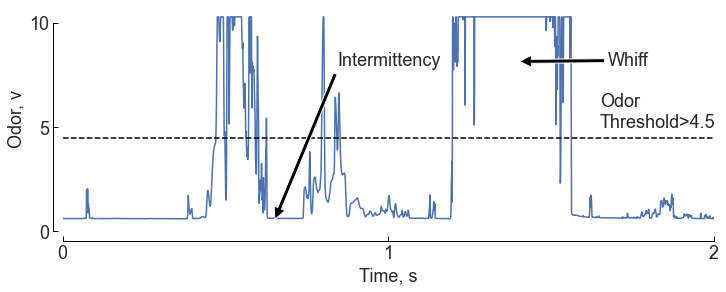

In [6]:
f,ax=plt.subplots(1,1,figsize=(10,4))
ax.plot(df.time,df.odor)
ax.set_xlim(130,150)
ax.grid(False)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={}, 
                            smart_bounds=True,
                            xticks=[130,140,150],
                            yticks=[0,5,10],
                            linewidth=1)
ax.axhline(4.5, linestyle='--', c='black')
ax.text(146.5,5,'Odor\nThreshold>4.5')

ax.annotate('Intermittency',
            xy=(136.5, 0.5), xycoords='data',
            xytext=(0.58, 0.8), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='right', verticalalignment='top')

ax.annotate('Whiff',
            xy=(144, 8.15), xycoords='data',
            xytext=(0.9, 0.8), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='right', verticalalignment='top')

ax.set_xticklabels([0,1,2])
ax.set_xlabel('Time, s')
ax.set_ylabel('Odor, v')
f.tight_layout()
figurefirst.mpl_functions.set_fontsize(f, 18)
f.savefig('../../Figure/Paper/OdorTS.jpeg', dpi=300, bbox_inches = "tight")

In [165]:
# lat_lon_df['longitude']=lat_lon_df.lat
# lat_lon_df['latitude'] =lat_lon_df.lon
# lat_lon_df

In [7]:
# math.dist([loc.xsrc[0],loc.ysrc[0]],[loc.xsrc[1],loc.ysrc[1]])


### Desert Sensor Location

In [2]:
traj = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/TrajectoryInt.h5")
loc=pd.read_hdf('~/Documents/Myfiles/DataAnalysis/data/WindstationLocations.h5')

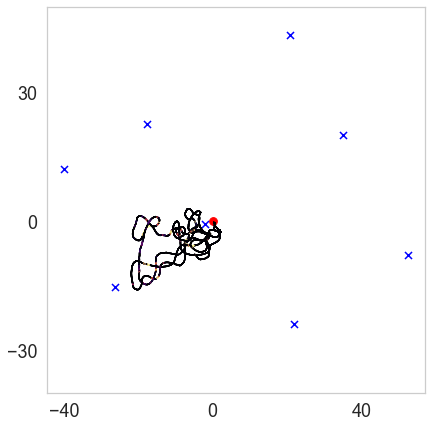

In [4]:
## DESERT


# n=130000
f,ax = plt.subplots(1,1, figsize=(6,6))
ax.scatter(0, 0, s=60, color="red", label="Odor Source")
ax.scatter(loc.xsrc,loc.ysrc,marker='x',s=50, color="blue", label='Wind Sensors')
# ax.scatter(forest.xsrc[:n],forest.ysrc[:n],c=forest.odor[:n],cmap= 'magma', s=0.2, alpha=0.2)
ax.scatter(traj.xsrc,traj.ysrc,c=traj.odor,cmap='inferno', s=0.2,alpha=0.2)

# ax.set_xlabel('Longitude, m')
# ax.set_ylabel('Latitude, m')
ax.ticklabel_format(useOffset=False)
ax.yaxis.set_major_locator(MaxNLocator(3))
ax.xaxis.set_major_locator(MaxNLocator(3))
ax.set_ylim(-40,50)
ax.grid(False)
# f.suptitle("Forest Sensor Location")
f.tight_layout()
# ax.legend(loc='upper left',fancybox=True, shadow=False)
figurefirst.mpl_functions.set_fontsize(f, 18)

# f.savefig('../../Figure/Paper/DesertSensorSetup.jpeg', dpi=300, bbox_inches = "tight")

### Forest Sensor Location

In [4]:
odor=pd.read_hdf('~/Documents/Myfiles/DataAnalysis/data/Sprints/HighRes/Forest/ForestDataJuly_S1.h5')
loc=pd.read_hdf('~/Documents/Myfiles/DataAnalysis/data/ForestSensorLocations.h5')


In [5]:
from shapely.geometry import Point
from geopy import distance
import geopandas as gpd
import utm
import datetime as dt


odor['geometry'] = odor.apply(lambda row: Point(row.lon, row.lat), axis=1)

geodf = gpd.GeoDataFrame(odor)
geodf.crs= {'init': 'epsg:4326'}
# change the projection of geodf
geodf = geodf.to_crs("+proj=utm +zone=11 +ellps=WGS84 +datum=WGS84 +units=m +no_def")

geodf["x"] = geodf.geometry.apply(lambda row:row.x)
geodf["y"] = geodf.geometry.apply(lambda row:row.y)

#source location to meters
# source = (40.79376709443614, -119.15757512132207) #desert
source =(39.252441,-119.878037)
# u =  utm.from_latlon(40.79376709443614, -119.15757512132207)
u =  utm.from_latlon(39.252441, -119.878037)
xfromsrc= geodf.x-u[0]
geodf.insert(4,'xsrc',xfromsrc) 

yfromsrc = geodf.y-u[1]
geodf.insert(5,'ysrc', yfromsrc)

In [6]:
traj=geodf
traj.xsrc=traj.xsrc+8
traj.ysrc = traj.ysrc-8

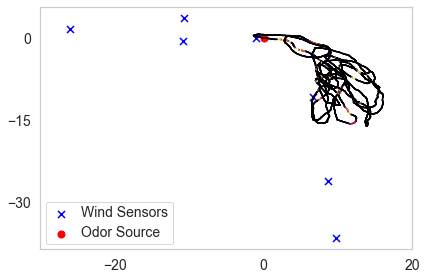

In [26]:
f,ax = plt.subplots(1,1, figsize=(6,4))

ax.scatter(loc.xsrc, loc.ysrc, marker ='x', s=50, color="blue", label="Wind Sensors")
# ax.scatter(dataframe.xsrc[4], dataframe.ysrc[4], facecolors='none', edgecolors='r', s=200)
ax.scatter(0,0, s=50, color="red", label="Odor Source")
# ax.scatter(-8,-45,  marker='x', s=70, color="green")
ax.scatter(traj.xsrc[100000:150000], traj.ysrc[100000:150000], c=traj.odor[100000:150000], cmap='inferno', s=0.2,alpha=0.2)
# ax.set_xlabel('Longitude, m')
# ax.set_ylabel('Latitude, m')
ax.grid(False)
ax.ticklabel_format(useOffset=False)
ax.yaxis.set_major_locator(MaxNLocator(3))
ax.xaxis.set_major_locator(MaxNLocator(3))
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xlim(-30,20)

ax.legend(loc='lower left',fancybox=True, shadow=False)
f.tight_layout()
figurefirst.mpl_functions.set_fontsize(f, 14)
f.savefig('../../Figure/Paper/ForestSetup.jpeg', dpi=300, bbox_inches = "tight")

In [153]:
# dt=df.master_time[1]-df.master_time[0]

# time = []
# time.append(0)
# for i in range(1,len(df)):
#     time.append(time[i-1]+dt)
    
# df['time'] = time                                

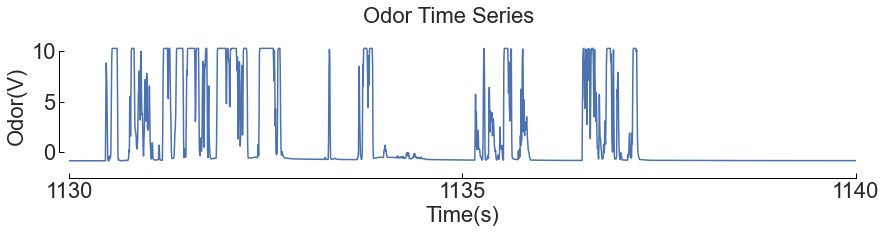

In [164]:
# f,ax=plt.subplots(1,1,figsize=(12,3))
# ax.plot(df.time,df.odor)
# ax.set_xlim(1130,1140)
# ax.grid(False)
# mpl_functions.adjust_spines(ax,['left','bottom'],
#                            spine_locations={}, 
#                            smart_bounds=True,
#                            xticks=[1130,1135,1140],
#                            yticks=[0,5,10],
#                            linewidth=1)

# ax.set_xlabel('Time(s)')
# ax.set_ylabel('Odor(V)')
# f.suptitle("Odor Time Series")
# f.tight_layout()
# mpl_functions.set_fontsize(f, 22)
# f.savefig('../../Figure/OdorTSForest.jpeg', dpi=300, bbox_inches = "tight")

In [29]:
dir = '~/Documents/Myfiles/DataAnalysis/data/Sprints/HighRes/'
df1 = pd.read_hdf(dir+'Windy/WindyMASigned.h5')
df2 = pd.read_hdf(dir+'NotWindy/NotWindyMASigned.h5')

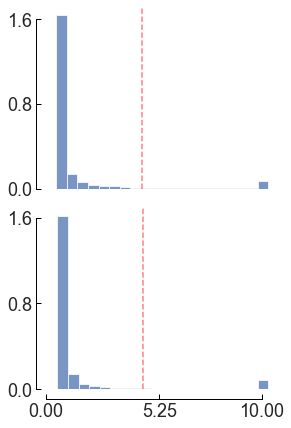

In [63]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(4,6))
n, bins, patches = ax1.hist((df1.odor), 20, density=True, facecolor='b', alpha=0.75)
n, bins, patches = ax2.hist((df2.odor), 20, density=True, facecolor='b', alpha=0.75)
ax1.grid(False)
ax2.grid(False)
mpl_functions.adjust_spines(ax1,['left'],
                           spine_locations={}, 
                           smart_bounds=True,
                           yticks=[0,.8,1.6],
                           xticks=[0,5.25,10],
                           linewidth=1)
mpl_functions.adjust_spines(ax2,['left','bottom'],
                           spine_locations={}, 
                           smart_bounds=True,
                           yticks=[0,.8,1.6],
                           xticks=[0,5.25,10],
                           linewidth=1)

ax1.axvline(4.5,c='red',linestyle='--', alpha=0.5)
ax2.axvline(4.5,c='red',linestyle='--', alpha=0.5)
# ax1.set_xlabel('Odor Concentration, v')
# ax1.set_ylabel('Frequency')
# ax2.set_ylabel('Frequency')
# ax2.set_xlabel('Odor Concentration, v')
# f.text(0.5, -0.07, 'Odor Concentration, v', ha='center')
# f.suptitle("Odor Concentration Histogram")
f.tight_layout()
mpl_functions.set_fontsize(f, 18)
# f.savefig('../../Figure/Paper/OCHist.jpeg', dpi=300, bbox_inches = "tight")
# print(n,bins,patches)

### Measuring Distance

In [67]:
def calculate_dst(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 * 1000 # meters

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) **2 + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) **2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [68]:
#10cm
lat1 = 39.5394048; lat2 = 39.5394114; long1 = -119.8130651; long2 = -119.8130529
print( calculate_dst((lat1, long1), (lat2, long2)) )

1.2779171005367047


In [158]:
len(x)

16

In [69]:
from geopy import distance

coords_1 = (39.5396558, -119.8123645)
coords_2 = (39.5396561,-119.8123642)

print (distance.distance(coords_1, coords_2).m)

0.042124771249924205


In [70]:
#5cm
lat1 = 39.5394067; lat2 = 39.5394074; long1 = -119.8130486; long2 = -119.8130529
print(calculate_dst((lat1, long1), (lat2, long2)) )

0.37685967028107026


In [102]:
forestlocations = pd.DataFrame()

In [104]:
forestlocations['lon'] = [-119.878174,-119.878288, -119.878288, -119.878464, -119.878082, 
                          -119.878052, -119.878036]

forestlocations['lat'] = [39.252392, 39.252384, 39.252422, 39.252399, 39.252296, 39.252159, 39.252064]

In [105]:
forestlocations['source']= [(-119.878161, 39.252392),0,0,0,0,0,0]

In [109]:
forestlocations.to_hdf('~/Documents/Myfiles/DataAnalysis/data/ForestSensorLocations.h5', key='forestlocations', mode='w')

In [71]:
#2cm
lat1 = 39.5394021; lat2 = 39.5394045; long1 = -119.813052; long2 = -119.8130529
print( calculate_dst((lat1, long1), (lat2, long2)) )

0.2778033568972474


In [84]:
## from geopy import distance

# coords_1 = (39.54644600, -119.81473767)
# coords_2 = (39.54646483, -119.81476417)
source =(39.252392,-119.878161)
nearest=( 39.252392, -119.878174)

print (distance.distance(source, nearest).m)

1.1221314500395496


In [72]:
#1cm
lat1 = 39.5393945; lat2 = 39.539392; long1 = -119.8130723; long2 = -119.8130765
print( calculate_dst((lat1, long1), (lat2, long2)) )

0.4549629571360745


In [73]:
from geopy import distance

coords_1 = (39.54644600, -119.81473767)
coords_2 = (39.54646483, -119.81476417)

print (distance.distance(coords_1, coords_2).m)

3.0918001715157133


In [74]:
lat1 = 39.54644600; lat2 = 39.54646483; long1 = -119.81473767; long2 = -119.81476417
print( calculate_dst((lat1, long1), (lat2, long2)) )

3.089804096509921


The great-circle distance or orthodromic distance is the shortest distance between two points on the surface of a sphere, measured along the surface of the sphere (as opposed to a straight line through the sphere's interior). The distance between two points in Euclidean space is the length of a straight line between them, but on the sphere there are no straight lines. In spaces with curvature, straight lines are replaced by geodesics. Geodesics on the sphere are circles on the sphere whose centers coincide with the center of the sphere, and are called great circles : https://en.wikipedia.org/wiki/Great-circle_distance

In [75]:
#12.7cm
from geopy import distance
coords_1 = (39.5396558, -119.8123645)
coords_2 = (39.5396561,-119.8123642)

print (distance.geodesic(coords_1, coords_2).meters)

0.042124771249924205


In [76]:
#2inches ; 5cm
from geopy import distance
coords_1 = (39.539656, -119.8123641)
coords_2 = (39.5396561, -119.8123645)

print (distance.geodesic(coords_1, coords_2).meters)

0.036133794195798374


In [77]:
#1 feet ; 0.3048 meters ; 30.48cm

from geopy import distance
coords_1 = (39.5396559, -119.8123646)
coords_2 = (39.5396561, -119.8123642)

print (distance.geodesic(coords_1, coords_2).meters*100)

4.093229635045674


In [78]:
#4 feet; 1.2192 meters ; 121.92
from geopy import distance
coords_1 = (39.5396561, -119.8123641)
coords_2 = (39.5396561, -119.8123643)

print (distance.geodesic(coords_1, coords_2).meters)

0.01719290415275028


In [79]:
#3 inches ; 0.0762 meters; 7.62cm

from geopy import distance
coords_1 = (39.5471637, -119.8156282)
coords_2 = (39.547164, -119.8156271)

print (distance.geodesic(coords_1, coords_2).meters)

0.10024599323183879


In [80]:
#5 inches; 0.127 meters; 12.7 cm

from geopy import distance
coords_1 = (39.547163, -119.8156307)
coords_2 = (39.5471638, -119.8156288)

print (distance.geodesic((39.547163, -119.8156307), coords_2).meters)

0.18590565457263297


In [81]:
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1- a)))
   return res*1000

In [82]:
haversine_distance(39.547163, -119.8156307, 39.5471638, -119.8156288)

0.18561536921625